<font size="10">Zadanie 1</font>


**Cel**
Użyj regresji liniowej do przewidzenia ceny domu na podstawie jego metrażu.


- <font size="6">Krok 1: Importowanie bibliotek</font>


Potrzebne będą Ci biblioteki numpy do operacji na danych, matplotlib do rysowania wykresów oraz scikit-learn do wykonania regresji liniowej.

In [6]:
#zaimportuj biliotekę numpy
#zaimportuj bibliotekę matplotlib
#pozostałe biblioteki dodaję poniżej
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

- <font size="6">Krok 2: Przygotowanie danych</font>

Dane już przygotowałem wystarczy uruchomić zestaw danych, proszę znaleźć do czego potrzebujemy takiej funkcji jak reshape.
Z zajęć pamiętamy o znaczeniu poszczególnych elementów:

__X__ : Dane wejściowe (cechy, niezależne zmienne), 

__y__ : Dane wyjściowe (zmienna zależna, etykieta, odpowiedź),


In [15]:
# Rozszerzone metraże i ceny domów
X = np.array([
    50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150,  
    160, 170, 180, 190, 200, 210, 220, 230, 240, 250,  
    260, 270, 280, 290, 300, 310, 320, 330, 340, 350   
]).reshape(-1, 1)

y = np.array([
    10, 20, 380, 400, 430, 450, 480, 500, 520, 540, 560,  
    580, 600, 620, 640, 660, 680, 700, 720, 740, 760,       
    780, 800, 820, 840, 860, 880, 900, 920, 1200, 1300       
])

- <font size="6">Krok 3: Podzielmy dane na zestaw treningowy i testowy</font>

Ten krok również jest zrobiony

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

funkcja __train_test_split__ z biblioteki __scikit-learn__, służy do podziału danych na zestawy treningowe i testowe. Oto szczegółowe wyjaśnienie każdego elementu:

* X_train: Jest to zbiór danych wejściowych przeznaczonych do treningu modelu. Zawiera pewien procent (w tym przypadku 80%) całkowitych danych wejściowych X, które zostały wybrane losowo. Te dane będą używane przez algorytm uczenia maszynowego do nauki.
 
* X_test: To zbiór danych wejściowych używany do testowania modelu. Stanowi pozostały procent (w tym przypadku 20%) całkowitych danych wejściowych X, który nie został wykorzystany w treningu (X_train). Używa się go do oceny, jak dobrze model radzi sobie z nowymi, niewidzianymi danymi.

* y_train: Jest to zbiór danych wyjściowych (etykiet lub odpowiedzi), odpowiadających X_train, używanych w procesie treningu. Dla każdego elementu w X_train istnieje odpowiadający mu element w y_train, który model próbuje przewidzieć.

* y_test: To zbiór danych wyjściowych odpowiadających X_test, używany do oceny skuteczności modelu. Podobnie jak w przypadku y_train, dla każdego elementu w X_test istnieje odpowiadający mu element w y_test, który służy jako "prawdziwa" odpowiedź przy testowaniu dokładności przewidywań modelu..delu.

- <font size="6">Krok 4: Trenowanie modelu regresji liniowej</font>


Tworzymy i trenujemy model regresji liniowej na danych treningowych, ten krok również jest przygotowany.

In [45]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

- <font size="6">Krok 5: Przewidywanie i ocena modelu</font>

Wykonamy przewidywania na podstawie zestawu testowego i ocenimy model. Użyjemy miar takich jak R^2 aby ocenić jak dobrze model pasuje dp danych.

In [46]:
y_pred = model.predict(X_test)
print("Accuracy of the model:", model.score(X_test, y_test))

Accuracy of the model: 0.8715359976384469


- <font size="6">Krok 6: Wizualizacja wyników</font>

Wyświetl wykres z danymi treningowymi, testowymi oraz linią regresji.



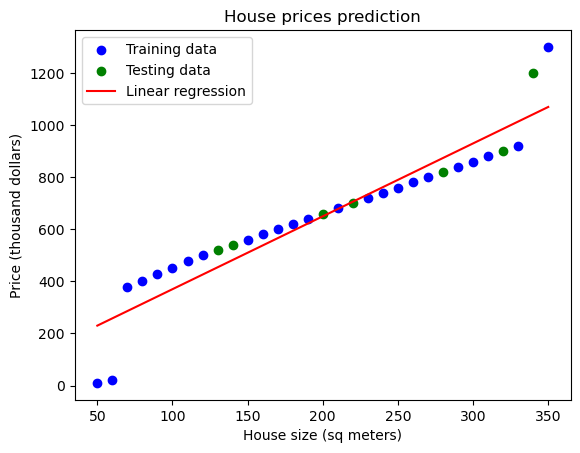

In [47]:
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='green', label='Testing data')
plt.plot(X, model.predict(X), color='red', label='Linear regression')
plt.title('House prices prediction')
plt.xlabel('House size (sq meters)')
plt.ylabel('Price (thousand dollars)')
plt.legend()
plt.show()

<font size="5">Odpowiedz poniżej na 3 pytania:</font>
1. Co można zrobić z danymi aby osiągnąć więcej niż 0,9 dopasowania, zaproponuj takie dane.
2. Zmiana "test_size" wpływa na to jak duży procent danych jest wykorzystany do testowania modelu a jak duży do treningu. Jakie otrzymasz accuracy, przy zmianie tej wartości na 10%, 50%, 80% i 90%
3. Do czego jest używany reshape w kroku 2

Miejsce na odpowiedź: 
1. 
2.
3. 

<font size="10">Zadanie 2</font>

<font size="5">Zadanie: Przewidywanie mediany cen domów w Californi</font>


- <font size="6">Krok 1:Import bibliotek i danych</font>

Zaimplementujmy standardowe biblioteki + dodatkowo załadujmy dane z biblioteki sklearn związane z cenami domów w Californi

In [53]:
#miejsce na pozostałe importy :)
from sklearn.datasets import fetch_california_housing

- <font size="6">Krok 2:Wczytanie i przygotowanie danych</font>

Obrobię dane za Państwa, skupimy się na czymś takim jak "RM" czyli liczba pokoi 

In [110]:
california = fetch_california_housing()
print(california.data[:10])

Na tej stronie można znaleźć opis tych danych:
https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html

Poniżej skrócony opis ode mnie

- MedInc - medianowy dochód w bloku mieszkalnym [0]
- HouseAge - mediana wieku domów w bloku [1]
- AveRooms - średnia liczba pokoi na dom [2]
- AveBedrms - średnia liczba sypialni na dom [3] 
- Population - liczba osób zamieszkujących blok [4]
- AveOccup - średnia liczba osób zamieszkujących dom [5]
- Latitude - szerokość geograficzna [6]
- Longitude - długość geograficzna [7]

In [98]:
#Proszę wybrać jeden z tych elementów wstawiając zamiast "i" numer elementu
X = california.data[:, [i]]  # wprowadź cechę którą chcesz zbadać
y = california.target


- <font size="6">Krok 3:Podział danych na zestaw treningowy i testowy</font>

Podziel dane, tak jak w poprzednim przykładzie.

- <font size="6">Krok 4:Trenowanie modelu regresji</font>

Utwórz i wytrenuj model regresji liniowej na danych treningowych. 

In [122]:
# Trenowanie modelu regresji liniowej


- <font size="6">Krok 5:Przewidydwanie na podstawie zestawu testowego</font>



In [107]:
# Przewidywanie na podstawie zestawu testowego


- <font size="6">Krok 6:Wizualizacja </font>



In [121]:
#plt.title('Predykcja cen domów w Kalifornii')
#plt.xlabel('X')
#plt.ylabel('Mediana ceny domu (x100,000 $)')
#plt.legend()
#plt.show()

<font size="6">PYTANIA</font>


In [106]:
#1. Podaj 3 cechy w odpowiedniej kolejności która cecha najlepiej nadaje się do sprawdzenia ceny domu w Kaliforni?    
    
#2. Jakie accuracy osiągnąłeś/osiągnęłaś przy cesze związaną z szerokością geograficzną?
   
#3. Czy Twoim zdaniem któraś z tych cech jest użyteczna? Dlaczego?</font>

#4. Oprócz oceny modelu współczynnikiem determinacji, model można ocenić średnim błędem kwadratowym MSE, używając funkcji mean_squared_error, jakie wtedy otrzymujesz wyniki oceny modelu dla najlepszej sytuacji?

<font size="10">Zadanie 3</font>

<font size="5">Zadanie: Przewidywanie postępu cukrzycy po roku od badania</font>

Zestaw danych dotyczących cukrzycy zawiera dziesięć zmiennych bazowych: wiek, płeć, wskaźnik masy ciała, średnie ciśnienie krwi oraz sześć pomiarów surowicy krwi. Celem jest przewidzenie postępu choroby po roku od podstawowego badania, co jest kwantyfikowane za pomocą miary ilościowej choroby.



https://rowannicholls.github.io/python/data/sklearn_datasets/diabetes.html

In [124]:
#Krok 1: Importowanie bibliotek i danych

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Wczytanie zestawu danych dotyczących cukrzycy
diabetes = datasets.load_diabetes()

#Krok 2: Podział danych na zestaw treningowy i testowy

#Krok 3: Budowa i trening modelu regresji liniowej


#Krok 4: Ocena modelu, Dokonaj predykcji i sprawdź współczynnik determinacji R^2 i średni błąd kwadratowy MSE


#Krok 5: Wizualizacja wyników



In [ ]:
<font size="6">PYTANIA</font>

In [ ]:
#1. Jakie cechy mają największy wpływ na postęp cukrzycy?

#2. Przy najlepszej cesze jakie są wartości MSE i R^2

#3. Czy dodanie większej ilości danych poprawi model?

<font size="10">Zadanie 4</font>

<font size="5">Korelacja danych cukrzycy</font>

In [131]:
from sklearn.datasets import load_diabetes
import pandas as pd

#Do liczenia Korelacji potrzebujemy dataFrame, bierzemy cel "progression" i dodajemy do danych
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target, name="Progression")

# Dodanie kolumny Progression do DataFrame
X['Progression'] = y

# Obliczenie współczynnika korelacji Pearsona dla X jak na poprzednich zajęciach


# Wyświetlenie macierzy korelacji jak na poprzednich zajęciach


<font size="10">Zadanie 5</font>

<font size="5">Korelacja danych domów z Kalifornii</font>

In [130]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.Series(california.target, name="MedianHouseValue")

# Dodajemy medianę cen domów do DataFrame
X['MedianHouseValue'] = y

# Rysujemy macierz korelacji

<font size="10">Pytania finalne</font>

<font size="4">
1. Jakie mamy wnioski z dwóch poprzednich zadań?
    
2. Jakie elementy miały najlepszą korelację dla zbioru cukrzycy?

3. Jakie elementy miały najlepszą korelację dla zbioru domów z Californi?
</font>

In [133]:
#1

#2

#3
